    In this notebook we would create BOW and apply Naive Baye's(Bernoullis' and Multinomial)
    also apply tfidf

In [1]:
import warnings;
warnings.filterwarnings('ignore')

Loading the data

In [2]:
import pickle
with open('../data/clean-data.pkl','rb') as fp:
    X,Y = pickle.load(fp)
fp.close()

In [3]:
# counting 80% for train-test split
l = int(0.8*len(X))
pred = {}
save_results = {}

### Highly imbalanced Dataset

In [4]:
from collections import Counter
Counter(Y[:l])

Counter({0: 45046, 1: 248075})

### Creating BOW

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
m = CountVectorizer()
BOW_tr = m.fit_transform(X[:l])
BOW_ts = m.transform(X[l:])

### Multinomial NB

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
m = MultinomialNB(fit_prior=False).fit(BOW_tr,Y[:l])
pred['Multinomial NB'] = m.predict(BOW_ts)
save_results['Multinomial NB with BOW'] = pred['Multinomial NB']

### Bernoullis NB

In [9]:
from sklearn.naive_bayes import BernoulliNB

In [10]:
m = BernoulliNB(fit_prior=False).fit(BOW_tr,Y[:l])
pred['Bernoullis NB'] = m.predict(BOW_ts)
save_results['Bernoullis NB with BOW'] = pred['Bernoullis NB']

### Logistic Regression (L1)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
m = LogisticRegression(C=1,penalty='l1',n_jobs=-1,class_weight='balanced')
m.fit(BOW_tr,Y[:l])
pred['Logistic L1'] = m.predict(BOW_ts)

In [13]:
save_results['LR L1 using BOW'] = pred['Logistic L1']

### Logistic Regression (L2)

In [14]:
m = LogisticRegression(C=1,penalty='l2',n_jobs=-1,class_weight='balanced')
m.fit(BOW_tr,Y[:l])
pred['Logistic L2'] = m.predict(BOW_ts)

In [15]:
save_results['LR L2 using BOW'] = pred['Logistic L2']

### Plotting ROC

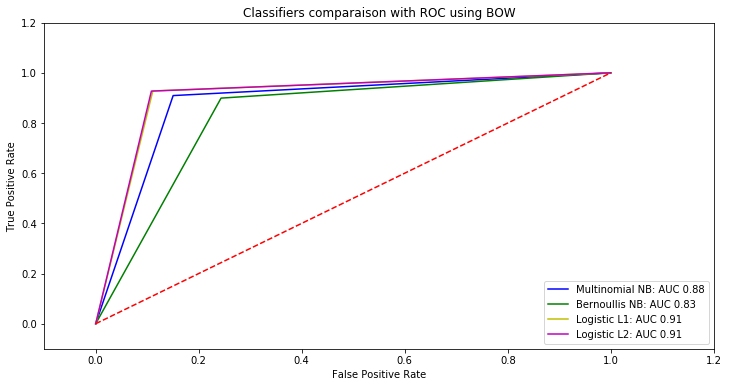

In [16]:

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

def formatt(x):
    return x;

vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']

for model, predicted in pred.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y[l:], vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC using BOW')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observation without class weights: 
* LR with L2 and L1 reg: AUC 0.87
* Then Multinomial NB: AUC 0.86
* Then Bernoulli's NB: AUC 0.79

### Observation with class weights:
* LR L1 & L2 reg AUC 0.91
* Multinomial NB: AUC 0.88
* Bernoulli's NB: AUC 0.83

### Using Tfidf

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
transformer = TfidfTransformer()
tfidf_tr = transformer.fit_transform(BOW_tr)

In [19]:
transformer = TfidfTransformer()
tfidf_ts = transformer.fit_transform(BOW_ts)

In [20]:
pred = {}

### Multinomial NB

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
m = MultinomialNB(fit_prior=False).fit(tfidf_tr,Y[:l])
pred['Multinomial NB'] = m.predict(tfidf_ts)

In [23]:
save_results['Multinomial NB using tfidf'] = pred['Multinomial NB']

### Bernoullis NB

In [24]:
from sklearn.naive_bayes import BernoulliNB

In [25]:
m = BernoulliNB(fit_prior=False).fit(tfidf_tr,Y[:l])
pred['Bernoullis NB'] = m.predict(tfidf_ts)

In [26]:
save_results['Bernoullis NB using tfidf'] = pred['Bernoullis NB']

### Logistic Regression (L1)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
m = LogisticRegression(C=2,penalty='l1',n_jobs=-1,class_weight='balanced')
m.fit(tfidf_tr,Y[:l])
pred['Logistic L1'] = m.predict(tfidf_ts)

In [29]:
save_results['LR L1 using tdidf'] = pred['Logistic L1']

### Logistic Regression (L2)

In [30]:
m = LogisticRegression(C=2,penalty='l2',n_jobs=-1,class_weight='balanced')
m.fit(tfidf_tr,Y[:l])
pred['Logistic L2'] = m.predict(tfidf_ts)

In [31]:
save_results['LR L2 using tdfidf'] = pred['Logistic L2']

### Plotting ROC

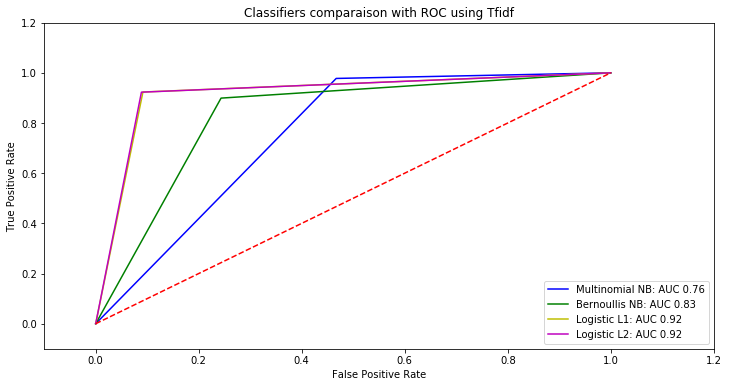

In [32]:

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

def formatt(x):
    return x;

vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']

for model, predicted in pred.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y[l:], vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC using Tfidf')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observation without class weights:
* Bernoulli's NB AUC 0.79
* Multinomial NB AUC 0.54
* LR L1 AUC 0.87
* LR L2 AUC 0.87

### Observation with Class weights:
* Bernoull's NB AUC 0.83
* Multinomial NB AUC 0.76
* LR L1 and L2 reg AUC 0.92

### Conclusion
* Logistic Regression is the better classifier for this dataset than NB.
* The AUC doesn't change upon incresing 'C' from 2 for Logistic Regression.
* Bag of words featurization is also pretty good for this problem, almost as good as Logistic regression and better in case of Naive Bayes which is obvious.
* Giving balanced class weights certainly helps in both NB and LR. Especially in tfidf, the class weights bring more % of increse in AUC. 

In [33]:
# Saving for later analysis
with open('../data/saved-res.pkl','wb') as fp:
    pickle.dump(save_results,fp)
fp.close()